## Load the data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [2]:
#read data set
df = pd.read_excel(r'C:\Users\sony\Downloads\Dataset_(1)\Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# data preprocessing

In [3]:
#information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


######   out put
        CustomerID and  Description  contain null values
        data set have one coulmn time type , 2 float , 4 sring and 1 integer .

In [4]:
# descripe integer columns
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


######   out put 
             Quantity and UnitPrice contain negative numbers and that impossible

In [5]:
#Using sum to know number of cells that contain neagtive value in this two coulmns 
price_negative= (df['UnitPrice'] < 0).sum()
quantity_negative= (df['Quantity'] < 0).sum()
print(price_negative ,quantity_negative)

2 10624


In [6]:
#Uing index to know where cells that contain neagtive value in this two coulmns 
index_price= df.index[df['UnitPrice'] < 0]
index_quantity=index= df.index[df['Quantity'] < 0]
#Drop cells 
df =df.drop(index_price)
df =df.drop(index_quantity)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
# the sum of null values in each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

###### out put
        Customer-id contain null values i need to drop that id is unique value i can't fill of by anything

In [8]:
df.shape

(531283, 8)


     data shape 531283 rows and 8 columns

In [9]:
#Drop null values
data=df.dropna()
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
data.shape

(397924, 8)


          shape after drop null values is 397924 rowa and 8 columns

In [11]:
# check that null values are dropped
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
#check if have duplicated rows or no
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 397924, dtype: bool


           data isn't have duplicated rows

# Feature Extraction

In [13]:
# i will add new column to data that i will calculate  the total money to each Invoice
#first take copy of data
new_data = data.copy()
#second calculte total price and save in  new coulmn total
new_data['Total'] = new_data['Quantity'] * new_data['UnitPrice']
new_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [14]:
import datetime
# spilt date to year in new coulmns year
new_data["Year"]=new_data['InvoiceDate'].dt.year
new_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011


In [15]:
data["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [16]:
# know top 20 countries have high total  
top_country = new_data.groupby(new_data['Country'].values)['Total'].sum()
# sort in decreasing order
top_country.sort_values(ascending=False).head(20)

United Kingdom     7308391.554
Netherlands         285446.340
EIRE                265545.900
Germany             228867.140
France              209024.050
Australia           138521.310
Spain                61577.110
Switzerland          56443.950
Belgium              41196.340
Sweden               38378.330
Japan                37416.370
Norway               36165.440
Portugal             33439.890
Finland              22546.080
Singapore            21279.290
Channel Islands      20450.440
Denmark              18955.340
Italy                17483.240
Cyprus               13590.380
Austria              10198.680
Name: Total, dtype: float64

 
         United Kingdom and Netherlands are the top 2 country

In [17]:
# know top 20 products have high total  
top_item = new_data.groupby(new_data['StockCode'].values)['Total'].sum()
# sort in decreasing order
top_item.sort_values(ascending=False).head(20)

23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
22502      47366.20
79321      46286.51
22086      42660.83
21137      39064.55
23203      37684.38
22386      37289.59
22197      37226.43
23298      36173.95
23284      35913.85
82484      34478.01
Name: Total, dtype: float64


          id product 23843 and 22423 are bestsellers

In [18]:
# know top 20 customers buy high total and what description and what quantity
top_cust = new_data.groupby('CustomerID')[['Total','Description','Quantity']].sum()
top_cust.sort_values(by='Total', ascending=False)


,Total,Description,Quantity
CustomerID,,,
14646.0,280206.02,PACK OF 12 WOODLAND TISSUES PACK OF 12 PINK PO...,197491
18102.0,259657.30,WOOD BLACK BOARD ANT WHITE FINISHUTILTY CABINE...,64124
17450.0,194550.79,BATH BUILDING BLOCK WORDHEART OF WICKER SMALLH...,69993
16446.0,168472.50,PANTRY SCRUBBING BRUSHPANTRY PASTRY BRUSHPAPER...,80997
14911.0,143825.06,ROSE COTTAGE KEEPSAKE BOX BLUE CHARLIE+LOLA PE...,80515
...,...,...,...
17956.0,12.75,SET OF 2 WOODEN MARKET CRATES,1
16454.0,6.90,MIDNIGHT BLUE DROP CRYSTAL NECKLACEManual,3
14792.0,6.20,CAROUSEL DESIGN WASHBAGAIRLINE BAG VINTAGE TOK...,2


              total of each customer-id , quantity and description of the items that  customer bought

In [19]:
# know total for ecah yaer
top_year = new_data.groupby('Year')[['Total']].sum()
top_year

,Total
Year,
2010,572713.890
2011,8338694.014


                Toal of year  2011 is more than 2010

## Machine-learning

In [20]:
X = new_data[['CustomerID','Total']].values



       x array of  the values of customer-id and total 

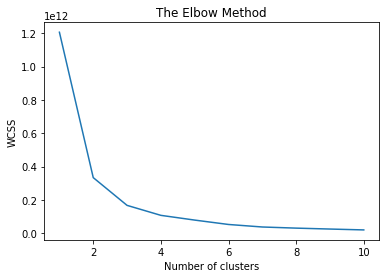

In [21]:
# Draw the elpow graph
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


  
      From elbow method the number of clusters are 3

In [22]:
n_clusters =3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [23]:
Y_kmeans=kmeans.predict(X)
Y_kmeans

array([2, 2, 2, ..., 0, 0, 0])

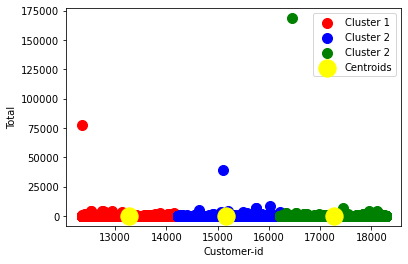

In [24]:
# Visualising the clusters
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow'
            , label = 'Centroids')
plt.xlabel('Customer-id')
plt.ylabel('Total')
plt.legend()
plt.show()

          
          the range of customer-id is different from total and i shoudn't scale id 
          and Customer is just id it is not consider meaningful number so after i search i will know that
          i should calculte Frequency (number of customers buy) and Recency (number of days from last purchase) next to                     total(amout). which called(RFM)
          

In [25]:
#calculte frequence 
# calculte the customer how many buy by count
frequecy = new_data.groupby('CustomerID')['InvoiceNo'].count()
# reset_index because without this custome_id appear as cells 
frequecy = frequecy.reset_index()
# rename coulmns
frequecy.columns = ['CustomerID', 'Frequency']
frequecy

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [26]:
# Convert timestamps to datetime
new_data["InvoiceDate"] = pd.to_datetime(new_data["InvoiceDate"], format='%m/%d/%Y %H:%M')

# Calculate max date as reference date
max_date =max(new_data["InvoiceDate"])

# calculate Recency
# recency is the difference between last InvoiceDate and reference date 
new_data['recency'] = ( max_date-new_data["InvoiceDate"] ).dt.days
# calculate recency for each cusomer
recency= new_data.groupby('CustomerID')['recency'].min()
#rest the index
recency= recency.reset_index()
#rename coulmns
recency.columns = ['CustomerID','recency']
# Print recency values
recency

,CustomerID,recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4334,18280.0,277
4335,18281.0,180
4336,18282.0,7
4337,18283.0,3


In [27]:
# calculte total to each customer
amount= new_data.groupby('CustomerID')['Total'].sum()
#rest index
amount = amount.reset_index()
#rename coulmns
amount.columns = ['CustomerID', 'amount']

In [28]:
# create new data contain amount , frequecy and recency for each cusomer 
x = pd.merge(pd.merge(amount,frequecy , on='CustomerID'),recency , on='CustomerID')
x

,CustomerID,amount,Frequency,recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4334,18280.0,180.60,10,277
4335,18281.0,80.82,7,180
4336,18282.0,178.05,12,7
4337,18283.0,2094.88,756,3


In [29]:
#drop id that now i no need 
x = x.drop('CustomerID', axis=1)


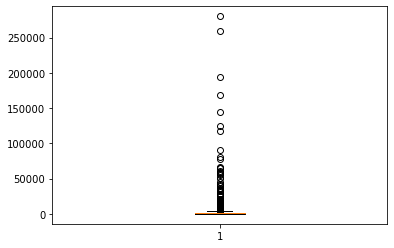

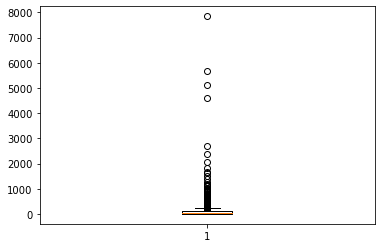

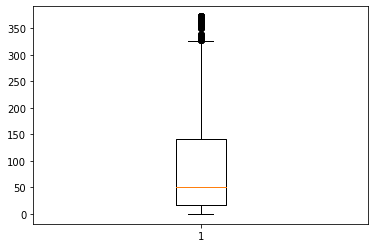

In [30]:
#check outlieres
numerical_features = x[['amount', 'Frequency', 'recency']]

# Create box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.boxplot(numerical_features[feature])
    plt.show()

         the data contain outlieres need to delet to increase accuracy of the model

In [31]:
#delet outlier bu IQR that delet data out the box 
numerical_features = x[['amount', 'Frequency', 'recency']]
# Q1 is the first quntile 25%
Q1 = numerical_features.quantile(0.25)
#Q3 is the third quntile 75%
Q3 = numerical_features.quantile(0.75)
#IQR is the defference between them
IQR = Q3 - Q1
#it's constant
iqr_multiplier = 1.5  
# the way i detect the outlier that bellow iqr_multiplier * IQR and above it 
outlier_mask = (numerical_features < (Q1 - iqr_multiplier * IQR)) | (numerical_features > (Q3 + iqr_multiplier * IQR))

# Remove rows with outliers
filtered_df = x[~outlier_mask.any(axis=1)]
filtered_df

,amount,Frequency,recency
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
5,2506.04,85,35
6,89.00,4,203
...,...,...,...
4333,173.90,9,73
4334,180.60,10,277
4335,80.82,7,180
4336,178.05,12,7


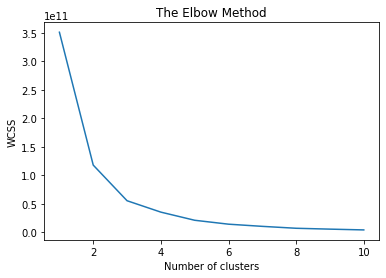

In [32]:
# Draw the elpow graph
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


         
         the cluster is 3

In [33]:
# scaling data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(filtered_df)
data_scaled

array([[0.48675615, 0.13513514, 0.22699387],
       [0.4760067 , 0.32432432, 0.05521472],
       [0.09056735, 0.07207207, 0.94785276],
       ...,
       [0.02188891, 0.02702703, 0.55214724],
       [0.04822224, 0.04954955, 0.02147239],
       [0.4976004 , 0.31081081, 0.12883436]])

In [34]:
n_clusters =3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [35]:
y_kmeans=kmeans.predict(data_scaled)
y_kmeans 


array([1, 2, 0, ..., 0, 1, 2])

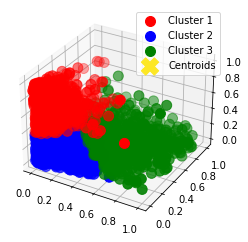

In [36]:
#visualization of 3d beacause i use 3 coulmns
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled[y_kmeans == 0, 0], data_scaled[y_kmeans == 0, 1], data_scaled[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(data_scaled[y_kmeans == 1, 0], data_scaled[y_kmeans == 1, 1], data_scaled[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
ax.scatter(data_scaled[y_kmeans == 2, 0], data_scaled[y_kmeans == 2, 1], data_scaled[y_kmeans == 2, 2], s=100, c='green', label='Cluster 3') 
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c=(1, 1, 0), label='Centroids', marker='X')
ax.legend()

plt.show()

               At final i can divide customers to three cluster based on total many the buy and how many the buy and date                       of last buy

## Hierarichal cluster 

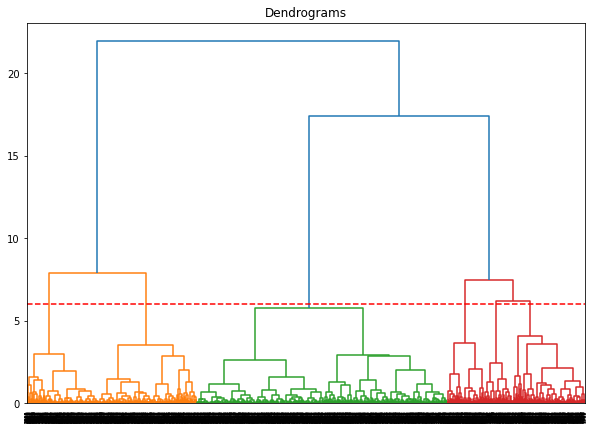

In [37]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')


           the denogram show us that i have 3 cluters first green and red stay in one group then orange cluster in distance    
           nearly 22

# Db Scan 

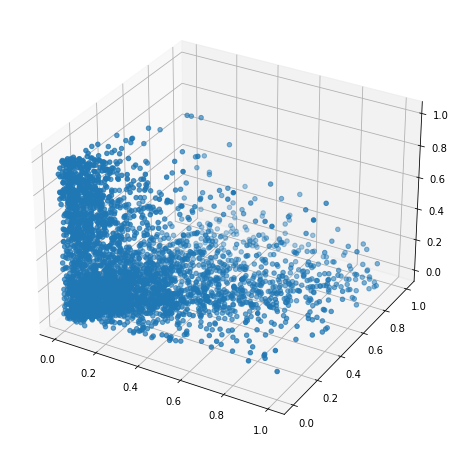

In [38]:

eps = 100 
min_samples = 50  
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(data_scaled)
unique_labels = np.unique(labels)
num_clusters = 3

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in unique_labels:
    if label == -1:
        ax.scatter(data_scaled[:, 0][labels == label], data_scaled[:, 1][labels == label], data_scaled[:, 2][labels == label], marker='x', label='Noise', color='black')
    else:
        ax.scatter(data_scaled[:, 0][labels == label], data_scaled[:, 1][labels == label], data_scaled[:, 2][labels == label], marker='o', label=f'Cluster {label}')
plt.show()


           in db-scan it make all data in one cluster so in this problem k means is better than db-scan model

In [40]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)